# Unveiling the Power of Machine Learning: A Comparative Analysis in predicting Bank Term Deposit Subscriptions for Marketing data

## An analysis by Alexandra Espialidou 
Faculty of Engineering, Environment and Computing <br>
MSc Data Science  <br>
Coventry University  <br>
espialidoa@uni.coventry.ac.uk 



### 1) Imported Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

### 2) Importing the dataset from https://archive.ics.uci.edu/dataset/222/bank+marketing

In [105]:
bank= pd.read_csv('Bank_additional_full.csv')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 3)Data Preparation

### 3A) Checking Class Imbalance

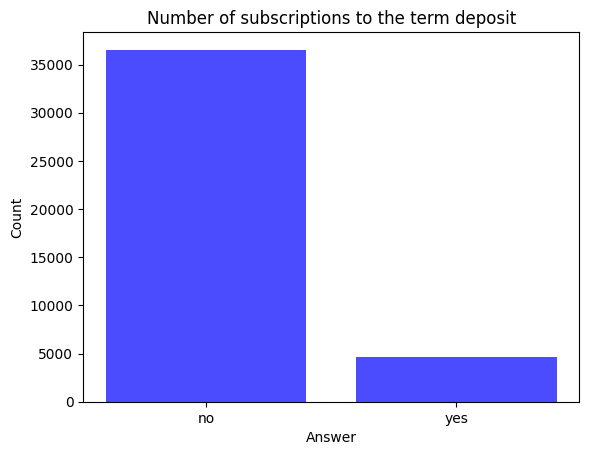

In [106]:
plt.hist(bank['y'], color='blue', alpha=0.7, bins=[0, 0.5, 1], rwidth=0.8)
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Number of subscriptions to the term deposit')
plt.xticks([0.25, 0.75], ['no', 'yes'])
plt.show()

### 3B) Bivariate Analysis

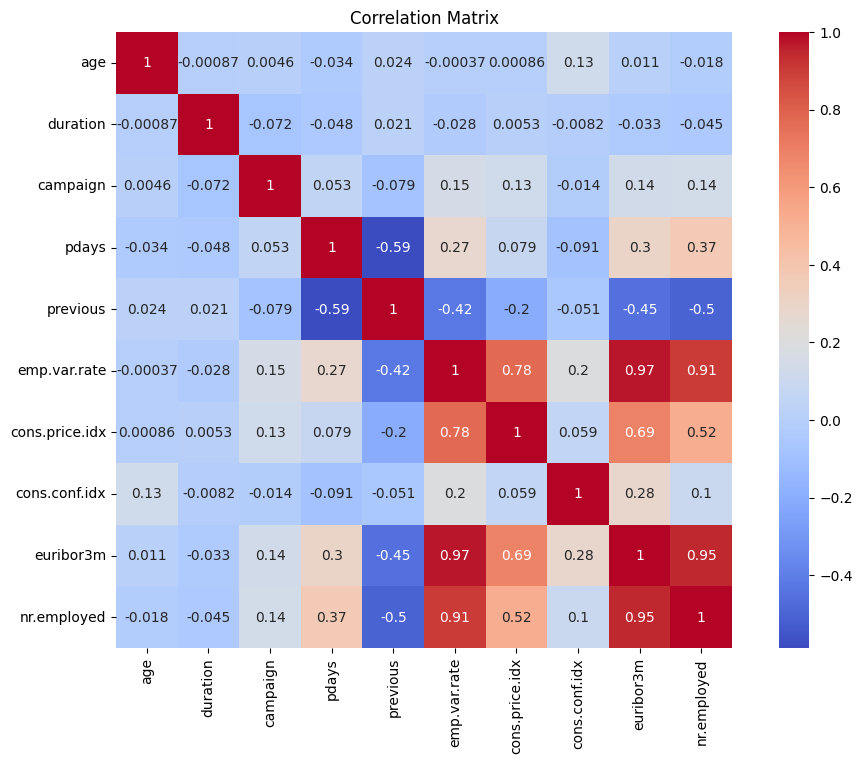

In [107]:
corr_matrix = bank.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### 3C) PCA

In [108]:
X = bank.drop('y', axis=1)
y = bank['y']

X_last5 = X.iloc[:, -5:]

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_last5)

PCA1 = ['PCA1']
new_bank = pd.DataFrame(X_pca, columns=PCA1)

bank.drop(bank.columns[15:20], axis=1, inplace=True)
bank = pd.concat([bank, new_bank], axis=1)
bank = bank.iloc[:, :-2].join(bank.iloc[:, -1:].join(bank.iloc[:, -2:-1]))
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,PCA1,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,-24.028952,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,-24.028952,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,-24.028952,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,-24.028952,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,-24.028952,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,203.481754,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,203.481754,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,203.481754,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,203.481754,yes


#### Checking the range of the numerical attributes

In [28]:
column_min = bank['nr.employed'].min()
column_max = bank['nr.employed'].max()
print("Min:", column_min)
print("Max:", column_max)

Min: 4963.6
Max: 5228.1


### 3D)Numerical Encoding

In [109]:
encoder = LabelEncoder()
bank['job_encoded'] = encoder.fit_transform(bank['job'])
bank.iloc[:, 1] = bank.iloc[:, -1]

bank["marital"].unique()
bank['marital_encoded'] = encoder.fit_transform(bank['marital'])
bank.iloc[:, 2] = bank.iloc[:, -1]

bank["education"].unique()
bank['education_encoded'] = encoder.fit_transform(bank['education'])
bank.iloc[:, 3] = bank.iloc[:, -1]

bank["default"].unique()
bank['default_encoded'] = encoder.fit_transform(bank['default'])
bank.iloc[:, 4] = bank.iloc[:, -1]

bank["housing"].unique()
bank['housing_encoded'] = encoder.fit_transform(bank['housing'])
bank.iloc[:, 5] = bank.iloc[:, -1]

bank["loan"].unique()
bank['loan_encoded'] = encoder.fit_transform(bank['loan'])
bank.iloc[:, 6] = bank.iloc[:, -1]

bank["contact"].unique()
bank["contact"] = (bank['contact']=='cellular').astype(int)

bank["month"].unique()
bank['month_encoded'] = encoder.fit_transform(bank['month'])
bank.iloc[:, 8] = bank.iloc[:, -1]

bank["day_of_week"].unique()
bank['day_of_week_encoded'] = encoder.fit_transform(bank['day_of_week'])
bank.iloc[:, 9] = bank.iloc[:, -1]

bank["campaign"].unique()
bank['campaign_encoded'] = encoder.fit_transform(bank['campaign'])
bank.iloc[:, 11] = bank.iloc[:, -1]

bank["poutcome"].unique()
bank['poutcome_encoded'] = encoder.fit_transform(bank['poutcome'])
bank.iloc[:, 14] = bank.iloc[:, -1]

bank["y"].unique()
bank['y'] = (bank['y']=='yes').astype(int)


bank = bank.iloc[:, :-10] #10 cols dropped
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,PCA1,y
0,56,3,1,0,0,0,0,0,6,1,261,0,999,0,1,-24.028952,0
1,57,7,1,3,1,0,0,0,6,1,149,0,999,0,1,-24.028952,0
2,37,7,1,3,0,2,0,0,6,1,226,0,999,0,1,-24.028952,0
3,40,0,1,1,0,0,0,0,6,1,151,0,999,0,1,-24.028952,0
4,56,7,1,3,0,0,2,0,6,1,307,0,999,0,1,-24.028952,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,1,7,0,334,0,999,0,1,203.481754,1
41184,46,1,1,5,0,0,0,1,7,0,383,0,999,0,1,203.481754,0
41185,56,5,1,6,0,2,0,1,7,0,189,1,999,0,1,203.481754,0
41186,44,9,1,5,0,0,0,1,7,0,442,0,999,0,1,203.481754,1


### 3E) Data Scaling, Splitting, Standardization

In [110]:
X = bank.drop('y', axis=1)
y = bank['y']

#SCALE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression

In [111]:
model = LogisticRegression() 
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [112]:
y_pred = model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_log)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10968
           1       0.42      0.87      0.57      1389

    accuracy                           0.85     12357
   macro avg       0.70      0.86      0.74     12357
weighted avg       0.92      0.85      0.87     12357

Accuracy: 0.8514202476329206


# K-Nearest Neighbour

##### Hyperparameter tuning

In [113]:
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_hyper = KNeighborsClassifier(n_neighbors=k)
    knn_hyper.fit(X_train_resampled, y_train_resampled)
    score = knn_hyper.score(X_test, y_test)
    print('k:',k, 'score:', score)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

k: 1 score: 0.8708424374848264
k: 2 score: 0.8770737233956462
k: 3 score: 0.8588654204094845
k: 4 score: 0.8638018936635106
k: 5 score: 0.8472930322893907
k: 6 score: 0.8541717245286072
k: 7 score: 0.8411426721696205
k: 8 score: 0.8476167354535891
k: 9 score: 0.8339402767662054
k: 10 score: 0.8417900784980173
best_k = 2
best_score = 0.8770737233956462


###### The k that gives the highest accuracy score is k=2.

In [114]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=2)

In [115]:
y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_knn)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10968
           1       0.46      0.49      0.47      1389

    accuracy                           0.88     12357
   macro avg       0.70      0.71      0.70     12357
weighted avg       0.88      0.88      0.88     12357

Accuracy: 0.8770737233956462


# Random Forest

##### Hyperparameter tuning

In [185]:
best_score = 0
best_estimator = -1
for estimators in range(1, 100):
    random_hyper = RandomForestClassifier(n_estimators = estimators)
    random_hyper(X_train_resampled, y_train_resampled)
    score = random_hyper.score(X_test, y_test)
    print('Estimator:',estimators, 'score:', score)
    if score > best_score:
        best_score = score
        best_estimator = estimators
        
print("Best estimator = " + str(best_estimator))
print("Best score = " + str(best_score))

Estimator: 1 score: 0.8728655822610666
Estimator: 2 score: 0.8965768390386016
Estimator: 3 score: 0.8875131504410455
Estimator: 4 score: 0.9009468317552805
Estimator: 5 score: 0.8935016589787165
Estimator: 6 score: 0.9013514607105284
Estimator: 7 score: 0.8975479485311969
Estimator: 8 score: 0.9077445982034474
Estimator: 9 score: 0.9016751638747269
Estimator: 10 score: 0.9028081249494214
Estimator: 11 score: 0.9011896091284293
Estimator: 12 score: 0.9053977502630088
Estimator: 13 score: 0.9008659059642308
Estimator: 14 score: 0.9093631140244396
Estimator: 15 score: 0.9065307113377034
Estimator: 16 score: 0.9068544145019017
Estimator: 17 score: 0.904750343934612
Estimator: 18 score: 0.9066925629198025
Estimator: 19 score: 0.9054786760540584
Estimator: 20 score: 0.903698308650967
Estimator: 21 score: 0.9062070081735049
Estimator: 22 score: 0.9077445982034474
Estimator: 23 score: 0.9050740470988103
Estimator: 24 score: 0.9097677429796877
Estimator: 25 score: 0.9060451565914057
Estimator: 

###### The estimator that gives the highest accuracy score is 24.

In [116]:
random_forest = RandomForestClassifier(n_estimators = 24)
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=24)

In [117]:
y_pred = random_forest.predict(X_test)
accuracy_rand = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_rand)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10968
           1       0.58      0.64      0.61      1389

    accuracy                           0.91     12357
   macro avg       0.77      0.79      0.78     12357
weighted avg       0.91      0.91      0.91     12357

Accuracy: 0.9071781176661002


### Model evaluation

In [118]:
print('Machine Learning Algorithms from best to worse:')
sorted_accuracies = sorted([(accuracy_log, 'Logistic Regression'), (accuracy_rand, 'Random Forest'), (accuracy_knn, 'K-Nearest Neighbour')], reverse=True)
for accuracy, name in sorted_accuracies:
    print(name, ":", accuracy)

Machine Learning Algorithms from best to worse:
Random Forest : 0.9071781176661002
K-Nearest Neighbour : 0.8770737233956462
Logistic Regression : 0.8514202476329206
